In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
loan = pd.read_csv('LoanDatasets.csv')

In [4]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
627,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
628,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
629,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


In [5]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
626,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
627,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
628,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
629,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y
630,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y


## Data pre-processing

In [7]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Checking null values

In [8]:
loan.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,False,False,False,False,False,False,False,False,False,False,False,False,False
627,False,False,False,False,False,False,False,False,False,False,False,False,False
628,False,False,False,False,False,False,False,False,False,False,False,False,False
629,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
print('We have {} Null values in data'.format(loan.isnull().values.sum()))

We have 152 Null values in data


In [12]:
loan.dropna(axis=1, inplace=True)

In [13]:
loan

,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status
0,LP001002,Graduate,5849,0.0,Urban,Y
1,LP001003,Graduate,4583,1508.0,Rural,N
2,LP001005,Graduate,3000,0.0,Urban,Y
3,LP001006,Not Graduate,2583,2358.0,Urban,Y
4,LP001008,Graduate,6000,0.0,Urban,Y
...,...,...,...,...,...,...
626,LP001028,Graduate,3073,8106.0,Urban,Y
627,LP001029,Graduate,1853,2840.0,Rural,N
628,LP001030,Graduate,1299,1086.0,Urban,Y
629,LP001032,Graduate,4950,0.0,Urban,Y


In [14]:
loan.isnull()

,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
626,False,False,False,False,False,False
627,False,False,False,False,False,False
628,False,False,False,False,False,False
629,False,False,False,False,False,False


In [16]:
print('We have {} Null values in data'.format(loan.isnull().values.sum()))

We have 0 Null values in data


## Checking duplicate values

In [17]:
loan.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
626     True
627     True
628     True
629     True
630     True
Length: 631, dtype: bool

In [18]:
print('No of duplicates in data: {}'.format(sum(loan.duplicated())))

No of duplicates in data: 17


In [19]:
loan.drop_duplicates(inplace = True)

In [20]:
print('No of duplicates in data: {}'.format(sum(loan.duplicated())))

No of duplicates in data: 0


## Converting categorical value into numerical value

In [21]:
loan[["Loan_ID"]] = loan[["Loan_ID"]].apply(lambda col:pd.Categorical(col).codes)

In [22]:
loan[["Education"]] = loan[["Education"]].apply(lambda col:pd.Categorical(col).codes)

In [23]:
loan[["ApplicantIncome"]] = loan[["ApplicantIncome"]].apply(lambda col:pd.Categorical(col).codes)

In [24]:
loan[["CoapplicantIncome"]] = loan[["CoapplicantIncome"]].apply(lambda col:pd.Categorical(col).codes)

In [25]:
loan[["Property_Area"]] = loan[["Property_Area"]].apply(lambda col:pd.Categorical(col).codes)

In [26]:
loan[["Loan_Status"]] = loan[["Loan_Status"]].apply(lambda col:pd.Categorical(col).codes)

In [32]:
loan

,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status
0,0,0,376,0,2,1
1,1,0,306,60,0,0
2,2,0,139,0,2,1
3,3,1,90,160,2,1
4,4,0,381,0,2,1
...,...,...,...,...,...,...
609,609,0,125,0,0,1
610,610,0,275,0,0,1
611,611,0,431,3,2,1
612,612,0,422,0,2,1


In [33]:
loan=loan.drop("CoapplicantIncome", axis=1)

In [34]:
loan

,Loan_ID,Education,ApplicantIncome,Property_Area,Loan_Status
0,0,0,376,2,1
1,1,0,306,0,0
2,2,0,139,2,1
3,3,1,90,2,1
4,4,0,381,2,1
...,...,...,...,...,...
609,609,0,125,0,1
610,610,0,275,0,1
611,611,0,431,2,1
612,612,0,422,2,1


## Splitting the dataset

In [67]:
x_train=loan.drop("Loan_Status", axis=1)

In [68]:
x_train

,Loan_ID,Education,ApplicantIncome,Property_Area
0,0,0,376,2
1,1,0,306,0
2,2,0,139,2
3,3,1,90,2
4,4,0,381,2
...,...,...,...,...
609,609,0,125,0
610,610,0,275,0
611,611,0,431,2
612,612,0,422,2


In [69]:
y_train=loan["Loan_Status"]

In [70]:
y_train

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int8

## Using the test dataset

In [71]:
loan2 = pd.read_csv('LoanDataset_test (1).csv')

In [72]:
loan2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [73]:
loan2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [74]:
loan2.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [75]:
loan2.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

## Checking null values

In [76]:
loan2.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
362,False,False,False,False,False,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False,False,False,False,False,False
364,False,False,False,False,False,False,False,False,False,False,True,False
365,False,False,False,False,False,False,False,False,False,False,False,False


In [78]:
print('We have {} Null values in data'.format(loan2.isnull().values.sum()))

We have 84 Null values in data


In [79]:
loan2.dropna(axis=1, inplace=True)

In [80]:
loan2

,Loan_ID,Married,Education,ApplicantIncome,CoapplicantIncome,Property_Area
0,LP001015,Yes,Graduate,5720,0,Urban
1,LP001022,Yes,Graduate,3076,1500,Urban
2,LP001031,Yes,Graduate,5000,1800,Urban
3,LP001035,Yes,Graduate,2340,2546,Urban
4,LP001051,No,Not Graduate,3276,0,Urban
...,...,...,...,...,...,...
362,LP002971,Yes,Not Graduate,4009,1777,Urban
363,LP002975,Yes,Graduate,4158,709,Urban
364,LP002980,No,Graduate,3250,1993,Semiurban
365,LP002986,Yes,Graduate,5000,2393,Rural


In [81]:
print('We have {} Null values in data'.format(loan2.isnull().values.sum()))

We have 0 Null values in data


In [82]:
loan2.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
362    False
363    False
364    False
365    False
366    False
Length: 367, dtype: bool

In [84]:
print('No of duplicates in data: {}'.format(sum(loan2.duplicated())))

No of duplicates in data: 0


## Converting categorical value into numerical value

In [85]:
loan2[["Loan_ID"]] = loan2[["Loan_ID"]].apply(lambda col:pd.Categorical(col).codes)

In [86]:
loan2[["Married"]] = loan2[["Married"]].apply(lambda col:pd.Categorical(col).codes)

In [87]:
loan2[["Education"]] = loan2[["Education"]].apply(lambda col:pd.Categorical(col).codes)

In [88]:
loan2[["ApplicantIncome"]] = loan2[["ApplicantIncome"]].apply(lambda col:pd.Categorical(col).codes)

In [89]:
loan2[["CoapplicantIncome"]] = loan2[["CoapplicantIncome"]].apply(lambda col:pd.Categorical(col).codes)

In [96]:
loan2[["Property_Area"]] = loan2[["Property_Area"]].apply(lambda col:pd.Categorical(col).codes)

In [97]:
loan2

,Loan_ID,Married,ApplicantIncome,CoapplicantIncome,Property_Area
0,0,1,251,0,2
1,1,1,102,43,2
2,2,1,230,67,2
3,3,1,43,110,2
4,4,0,120,0,2
...,...,...,...,...,...
362,362,1,177,65,2
363,363,1,186,12,2
364,364,0,117,75,1
365,365,1,230,101,0


In [99]:
loan2=loan2.drop("ApplicantIncome", axis=1)

In [100]:
loan2

,Loan_ID,Married,CoapplicantIncome,Property_Area
0,0,1,0,2
1,1,1,43,2
2,2,1,67,2
3,3,1,110,2
4,4,0,0,2
...,...,...,...,...
362,362,1,65,2
363,363,1,12,2
364,364,0,75,1
365,365,1,101,0


In [101]:
x_test=loan2.drop("Married", axis=1)

In [102]:
x_test

,Loan_ID,CoapplicantIncome,Property_Area
0,0,0,2
1,1,43,2
2,2,67,2
3,3,110,2
4,4,0,2
...,...,...,...
362,362,65,2
363,363,12,2
364,364,75,1
365,365,101,0


In [103]:
y_train=loan2["Married"]

In [104]:
y_train

0      1
1      1
2      1
3      1
4      0
      ..
362    1
363    1
364    0
365    1
366    0
Name: Married, Length: 367, dtype: int8

In [110]:
x_train.shape
(1, 6, 29)
y_train.shape
(29,)

(29,)

In [111]:
x_test.shape
(1, 6, 29)
y_test.shape
(29,)

(29,)

## Classification

## Random Forest Classification

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rf =RandomForestClassifier(n_estimators=100)

In [114]:
rf.fit(x_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [614, 367]

In [115]:
y_pred=rf.predict(x_test)

AttributeError: 'RandomForestClassifier' object has no attribute 'n_classes_'

## Prediction

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [51]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [52]:
confusion_matrix(y_pred,y_test)

array([[12, 14],
       [27, 70]], dtype=int64)

## Decision Tree Classifier 

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dtc=DecisionTreeClassifier()

In [55]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [56]:
y_pred=dtc.predict(x_test)

## accuracy_score

In [57]:
accuracy_score(y_pred,y_test)

0.5691056910569106

In [58]:
confusion_matrix(y_pred,y_test)

array([[11, 25],
       [28, 59]], dtype=int64)

In [59]:
from sklearn import tree

[Text(0.26706334786821706, 0.98, 'X[2] <= 30.0\ngini = 0.429\nsamples = 491\nvalue = [153, 338]'),
 Text(0.08139534883720931, 0.94, 'X[2] <= 20.5\ngini = 0.5\nsamples = 24\nvalue = [12, 12]'),
 Text(0.05426356589147287, 0.9, 'X[2] <= 12.5\ngini = 0.475\nsamples = 18\nvalue = [7, 11]'),
 Text(0.03875968992248062, 0.86, 'X[2] <= 8.0\ngini = 0.496\nsamples = 11\nvalue = [6, 5]'),
 Text(0.031007751937984496, 0.82, 'X[2] <= 5.5\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.023255813953488372, 0.78, 'X[3] <= 1.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.015503875968992248, 0.74, 'X[2] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.007751937984496124, 0.7, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.023255813953488372, 0.7, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.031007751937984496, 0.74, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.03875968992248062, 0.78, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.046511627906976744, 0.82,

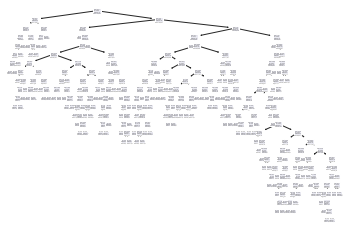

In [60]:
tree.plot_tree(dtc)

# Naive_Bayes classifier 

In [61]:
from sklearn.naive_bayes import BernoulliNB

In [62]:
nb = BernoulliNB()

In [63]:
nb.fit(x_test,y_test)

BernoulliNB()

In [64]:
y_pred = nb.predict(x_test)

In [65]:
accuracy_score(y_pred,y_test)

0.7154471544715447

## Regression

In [66]:
from sklearn import datasets, linear_model, metrics

In [ ]:
linearreg= linear_model.LinearRegression()

In [ ]:
linearreg.fit(x_train, y_train)

In [ ]:
print('Coefficients: ', linearreg.coef_)

In [ ]:
y_pred=linearreg.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred

In [ ]:
mean_squared_error(y_pred,y_test)

In [ ]:
print('score: {}'.format(linearreg.score(x_test, y_test)))

In [ ]:
plt.style.use('fivethirtyeight')
plt.scatter(linearreg.predict(x_train), linearreg.predict(x_train) - y_train, color = "green", s = 10)

In [ ]:
plt.scatter(linearreg.predict(x_test), linearreg.predict(x_test) - y_test,color = "red", s = 10)

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
randomregressor = RandomForestRegressor()

In [ ]:
randomregressor.fit(x_train, y_train) 

In [ ]:
Y_pred = randomregressor.predict(x_test) 

## Regression Score

In [ ]:
print('score: {}'.format(randomregressor.score(x_test, y_test)))